# K Nearest Neighbours

The k-nearest neighbors algorithm, also known as *KNN* or *k-NN*, is a non-parametric, supervised learning classifier, which uses **proximity** to make classifications or predictions about the grouping of an individual data point.

In this illustration I have explored the classification using k-NN algorithm.

### Dataset:

    Customer churn dataset from the telecom industry, which includes customer data such as 
            long-distance usage, 
            data usage, 
            monthly revenue, 
            types of offerings, 
            and other services purchased by customers.

### Aim

To understand the working of how to preprocess a feature to apply kNN algorithm and understand how to choose k value and evaluate the model.

### Importing libraries
    
    pandas
    numpy
    matplotlib            => Visualizing data
    seaborn               => Visualizing data
    KNeighborsClassifier  => KNN classifier model
    train_test_split      => Splitting dataset
    sklearn.metrics       => Evalute model with various scores
    sklearn.preprocessing => Encoders for categorical features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

##### Reading the dataset

In [2]:
data = pd.read_csv("churndata.csv")

#### Exploring the dataset

In [3]:
data.head(10)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
5,0.25,1,0.211765,0,0,1,0,0,0.0,1,...,0,0,0,1,0,0,0,1,0,0
6,0.00,0,0.352941,0,0,0,0,1,0.0,1,...,0,1,0,1,0,0,0,0,0,1
7,1.00,0,0.282353,0,1,1,0,1,0.0,1,...,0,0,1,0,0,0,1,0,0,0
8,0.00,1,0.223529,0,0,0,0,1,0.0,1,...,0,1,0,1,0,0,0,0,1,0
9,0.00,0,0.211765,1,0,0,0,0,0.0,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
data.shape

(7043, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [6]:
data.dtypes.value_counts()

int64      18
float64     5
dtype: int64

The dataset has 7043 examples for 23 features.

Among the 23 feature variables 18 are int datatype and 5 are float datatype.

###### Creating dataframe with feature variables and their total unique values for each feature

In [7]:
 df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variables', 'Unique_values']).set_index('Variables')

In [8]:
df_uniques

,Unique_values
Variables,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3


From the result above it can be seen that some of the features of dataset has 2 unique values, one feature have 3 unique values, two feature has 5 unique values, one feature has 50 unique values and one feature has 1585 unique values.

The feature with 2 unique values can be grouped as **binary variables**, feature with 3 to 10 unique values can be labelled as **ordinal variables** and the featuer with more than 10 unique values can be termed as **numerical varibles**.

#### Binary Variables

    The feature with two unique values in the dataset are grouped together.

In [9]:
binary_var = list(df_uniques[df_uniques.Unique_values==2].index)

In [10]:
binary_var

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value',
 'payment_Credit Card',
 'payment_Mailed Check',
 'internet_type_DSL',
 'internet_type_Fiber Optic',
 'internet_type_None',
 'offer_Offer A',
 'offer_Offer B',
 'offer_Offer C',
 'offer_Offer D',
 'offer_Offer E']

#### Ordinal Variables

    The feature with more than 2 unique values and less than 10 are grouped into ordinal stack.

In [11]:
ordinal_var = list(df_uniques[(df_uniques.Unique_values>2) & (df_uniques.Unique_values<=5)].index)

In [12]:
ordinal_var

['months', 'contract', 'satisfaction']

#### Numerical Variables

    The feature that have more than 10 unique values.

In [13]:
numeric_var = list(set(data.columns)-set(ordinal_var)-set(binary_var))

In [14]:
numeric_var

['gb_mon', 'monthly']

In [15]:
data[numeric_var]

,gb_mon,monthly
0,0.094118,0.212935
1,0.200000,0.620896
2,0.611765,0.768159
3,0.141176,0.798507
4,0.164706,0.579602
...,...,...
7038,0.000000,0.028856
7039,0.282353,0.662189
7040,0.694118,0.845274
7041,0.200000,0.112935


## Feature Scaling

The K-nearest neighbors algorithm uses distance and hence requires scaled data.

Scale the following group with respective scalers available in the sklearn.preprocessing module.

In [16]:
lb = LabelBinarizer()
le= LabelEncoder()

**LabelBinarizer => binary_variables**

**LabelEncoder => Ordinal_variables**

In [17]:
data[ordinal_var].describe()

,months,contract,satisfaction
count,7043.000000,7043.000000,7043.000000
mean,0.433551,0.377396,0.561231
std,0.398231,0.424234,0.300414
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.500000
50%,0.250000,0.000000,0.500000
75%,0.750000,1.000000,0.750000
max,1.000000,1.000000,1.000000


Transforming the oridinal variables with label_encoder

In [18]:
for column in ordinal_var:
    data[column] = le.fit_transform(data[column])

In [19]:
data[ordinal_var].astype('category').describe()

,months,contract,satisfaction
count,7043,7043,7043
unique,5,3,5
top,0,0,2
freq,2470,3610,2665


Transforming the binary variables with label_binarizer

In [20]:
for column in binary_var:
    data[column] = lb.fit_transform(data[column])

In [21]:
data[binary_var].astype('category').describe()

,multiple,security,backup,protection,support,unlimited,paperless,churn_value,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
freq,4072,5024,4614,4621,4999,4745,4171,5174,4294,6658,5391,4008,5517,6523,6219,6628,6441,6238


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,1.734204,1.592924,0.0,0.000000,1.000000,3.000000,4.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.754792,0.848468,0.0,0.000000,0.000000,2.000000,2.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0


feature scaling the ordinal and numerical variables with minmax scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [24]:
for column in [ordinal_var + numeric_var]:
    data[column] = mm.fit_transform(data[column])

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.433551,0.398231,0.0,0.000000,0.250000,0.750000,1.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.377396,0.424234,0.0,0.000000,0.000000,1.000000,1.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0


Now the data are encoded and scaled,and is ready for modelling with kNN algorithm

### Splitting dataset

Split the sample into training and test samples, with the test sample representing 30% of observations.

In [26]:
y, X = data['churn_value'], data.drop(columns='churn_value')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Train the kNN model with k=3(neighbours)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

###### Look at he classification report

In [28]:
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1524
           1       0.78      0.72      0.75       589

    accuracy                           0.86      2113
   macro avg       0.84      0.82      0.83      2113
weighted avg       0.86      0.86      0.86      2113

Accuracy score:  0.86
F1 Score:  0.75


###### Confusion Matrix for k=3

Text(0.5, 15.0, 'Actual')

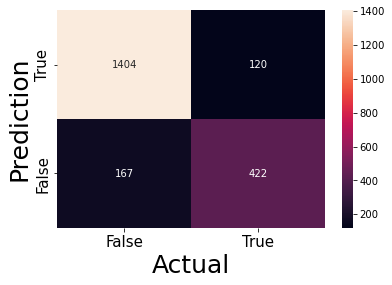

In [29]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Prediction', fontsize=25);
ax.set_xlabel('Actual', fontsize=25)

###### Train the kNN model with k=5(neighbours)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Classification report for the k=5

In [31]:
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1524
           1       0.80      0.73      0.77       589

    accuracy                           0.87      2113
   macro avg       0.85      0.83      0.84      2113
weighted avg       0.87      0.87      0.87      2113

Accuracy score:  0.87
F1 Score:  0.77


###### confusion matrix for k=5

Text(0.5, 15.0, 'Actual')

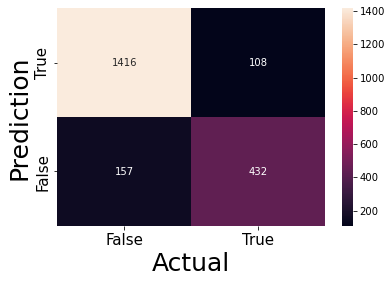

In [32]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Prediction', fontsize=25);
ax.set_xlabel('Actual', fontsize=25)

Hence when the k value is varied the f1_score and accuracy are varied

when k=3:
    
    accuracy = 0.86
    f1_score = 0.75
    
when k=5:
    
    accuracy = 0.87
    f1_score = 0.77
    
   Thus to find the right value for k, lets check the f1_score for values 1-40 and identify the best using elbow method.

function to calculate f1_score and error_rate(1-accuracy_score)

In [33]:
max_k = 40
f1_scores = list()
error_rates = list() # error_rate = 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [34]:
f1_results

,K,F1 Score
0,1,0.7407
1,2,0.7416
2,3,0.7526
3,4,0.7599
4,5,0.7713
5,6,0.7764
6,7,0.7833
7,8,0.7851
8,9,0.7797
9,10,0.7847


Here the f1_score is best at k=19 (0.8029)

Hence the optimum value for k in this problem is 19.

In [35]:
error_results

,K,Error Rate
0,1,0.1458
1,2,0.1448
2,3,0.1335
3,4,0.1292
4,5,0.1235
5,6,0.1202
6,7,0.1155
7,8,0.1145
8,9,0.1169
9,10,0.1145


The error rate is also least at k=19

##### Plotting the values of k and f1_score and error_rate

#### K vs F1_Score

Text(0.5, 1.0, 'K vs F1_Score')

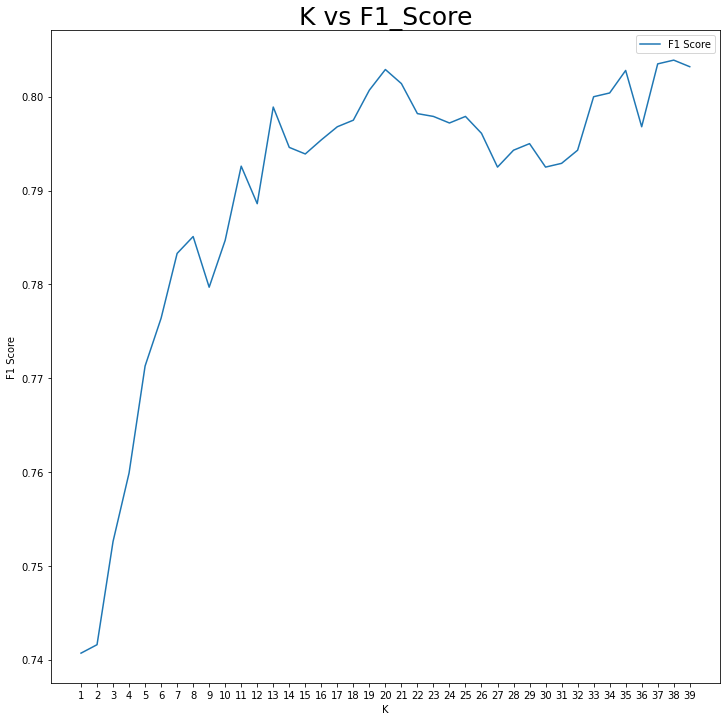

In [36]:
ax = f1_results.set_index('K').plot(figsize=(12,12))
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k));
plt.title('K vs F1_Score', fontsize=25)

#### k vs error_rate

     k vs error_rate plot results in elbow curve which has least error rate at optimum k value of the model 

Text(0.5, 1.0, 'KNN  Elbow curve')

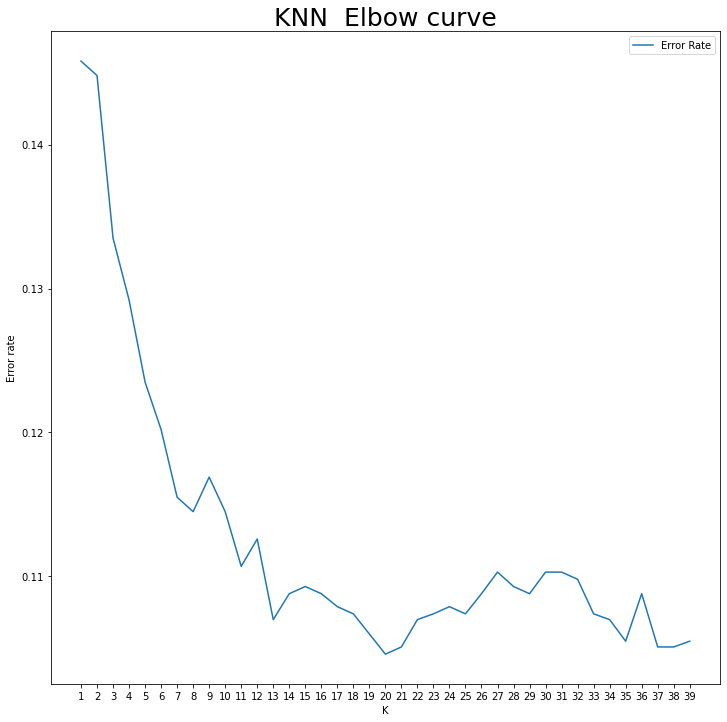

In [37]:
ax = error_results.set_index('K').plot(figsize=(12,12))
ax.set(xlabel='K', ylabel='Error rate')
ax.set_xticks(range(1, max_k));
plt.title('KNN  Elbow curve', fontsize=25)

Hence train the knn model with the optimum k value of 19 which gives better performance

In [38]:
knn = KNeighborsClassifier(n_neighbors=19, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 3))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1524
           1       0.84      0.76      0.80       589

    accuracy                           0.89      2113
   macro avg       0.88      0.85      0.86      2113
weighted avg       0.89      0.89      0.89      2113

Accuracy score:  0.89
F1 Score:  0.801


Hence the accuracy of the model is achieved **0.89** with k=19

#### confusion matrix for k=19

Text(0.5, 15.0, 'Actual')

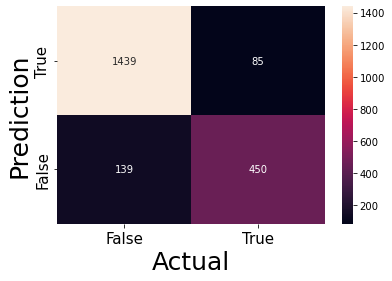

In [39]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Prediction', fontsize=25);
ax.set_xlabel('Actual', fontsize=25)